<a href="https://colab.research.google.com/github/OscarAliM/Para_el_final/blob/main/Regresion_Lineal_m%C3%BAltiple_y_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
df= pd.read_csv('consumer_Limpio.csv') 

**Modelo de Regresion 1**

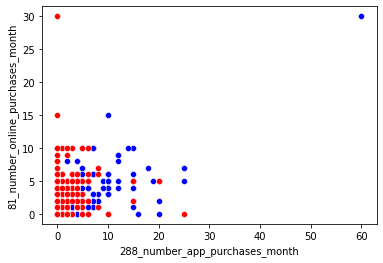

In [5]:
#Se grafican mapas de dispersión de las variables 3 variables:'288_number_app_purchases_month' y '289_number_whatsapp_purchases_month' al respecto a la variable "81_number_online_purchases_month"
from turtle import color

sns.scatterplot(x='288_number_app_purchases_month', y='81_number_online_purchases_month', color="blue", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='81_number_online_purchases_month', color="red", data=df)

In [6]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['288_number_app_purchases_month','289_number_whatsapp_purchases_month']]
Var_Dep= df['81_number_online_purchases_month']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['288_number_app_purchases_month',
        '289_number_whatsapp_purchases_month'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.34321156, -0.01887513]),
 '_residues': 1536.0942560300082,
 'rank_': 2,
 'singular_': array([100.49582449,  48.39341477]),
 'intercept_': 1.096721904712284}

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.43220114419111055

**MODELO PREDICTIVO 1**



In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df[['288_number_app_purchases_month', '289_number_whatsapp_purchases_month']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

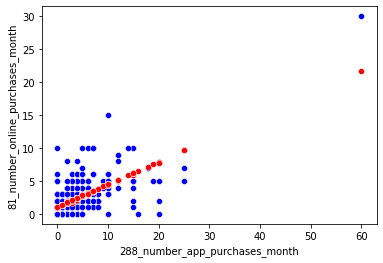

In [14]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='288_number_app_purchases_month', y='81_number_online_purchases_month', color="blue", data=df)
sns.scatterplot(x='288_number_app_purchases_month', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [15]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.43220114419111055

In [16]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6574200667694214

**Modelo de Regresion 2**

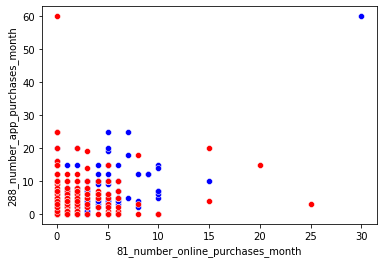

In [17]:
#Se grafican mapas de dispersión de las variables 3 variables:'288_number_app_purchases_month' y '289_number_whatsapp_purchases_month' al respecto a la variable "81_number_online_purchases_month"
from turtle import color

sns.scatterplot(x='81_number_online_purchases_month', y='288_number_app_purchases_month', color="blue", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='288_number_app_purchases_month', color="red", data=df)

In [28]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep1= df[['81_number_online_purchases_month','289_number_whatsapp_purchases_month']]
Var_Dep1= df['288_number_app_purchases_month']

In [29]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [30]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [31]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep1, y=Var_Dep1)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [33]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep1,Var_Dep1)

0.4433931239687263

**MODELO PREDICTIVO 2**

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred1= model.predict(X=df[['81_number_online_purchases_month','289_number_whatsapp_purchases_month']])
y_pred1

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_pred1)
df

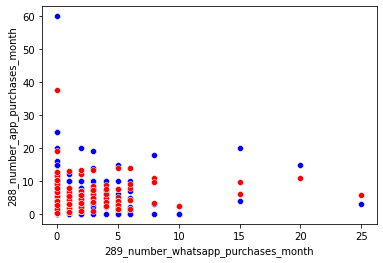

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='289_number_whatsapp_purchases_month', y='288_number_app_purchases_month', color="blue", data=df)
sns.scatterplot(x='289_number_whatsapp_purchases_month', y='Predicciones2', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [49]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model.score(X=Vars_Indep1, y=Var_Dep1)
coef_Deter1

0.4433931239687263

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl1=np.sqrt(coef_Deter1)
coef_Correl1

0.6658777094697842

**Modelo de Regresion 3**

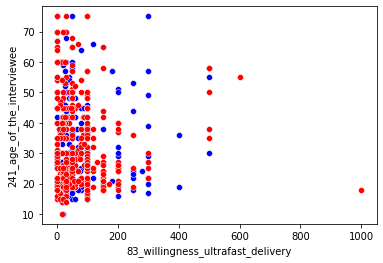

In [51]:
#Se grafican mapas de dispersión de las variables 3 variables:'288_number_app_purchases_month' y '289_number_whatsapp_purchases_month' al respecto a la variable "81_number_online_purchases_month"
from turtle import color

sns.scatterplot(x='83_willingness_ultrafast_delivery', y='241_age_of_the_interviewee', color="blue", data=df)
sns.scatterplot(x='84_willingness_sameday_delivery', y='241_age_of_the_interviewee', color="red", data=df)

In [52]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep2= df[['83_willingness_ultrafast_delivery','84_willingness_sameday_delivery']]
Var_Dep2= df['241_age_of_the_interviewee']

In [53]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [56]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [57]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['83_willingness_ultrafast_delivery',
        '84_willingness_sameday_delivery'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.00178467, -0.00738029]),
 '_residues': 72734.22270546513,
 'rank_': 2,
 'singular_': array([2141.8265837, 1113.2149454]),
 'intercept_': 33.3487164504864}

In [58]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep2,Var_Dep2)

0.003127327151174586

**MODELO PREDICTIVO 3**

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred2= model.predict(X=df[['83_willingness_ultrafast_delivery','84_willingness_sameday_delivery']])
y_pred2

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_pred1)
df

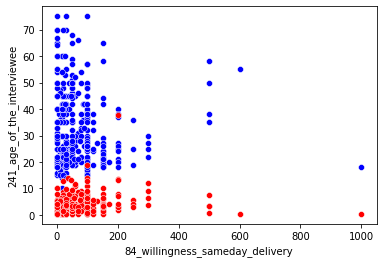

In [63]:
sns.scatterplot(x='84_willingness_sameday_delivery', y='241_age_of_the_interviewee', color="blue", data=df)
sns.scatterplot(x='84_willingness_sameday_delivery', y='Predicciones3', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.003127327151174586

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.05592251023670688

**REGRESION LOGISTICA 1**

In [77]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['81_number_online_purchases_month', '238_frequency_buying_store']]
Var_Dep= df['283_fulfill_needs']

In [78]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [79]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [80]:
#Se escalan todos los datos
escalar = StandardScaler()

In [81]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [82]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

In [85]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  0   5]
 [  0 108]]


In [86]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9557522123893806


In [87]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9557522123893806


In [88]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
1.0


In [89]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9773755656108597


**REGRESION LOGISTICA 2**

In [103]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep2= df[['288_number_app_purchases_month', '241_age_of_the_interviewee', '83_willingness_ultrafast_delivery']]
Var_Dep2= df['320_other_services_in_store']

In [104]:
#Redefinimos las variables 
X2= Vars_Indep2
y2= Var_Dep2

In [105]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state =None)

In [106]:
#Se escalan todos los datos
escalar2 = StandardScaler()

In [116]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X2_train = escalar2.fit_transform(X2_train)
X2_test = escalar2.transform(X2_test)

In [117]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo2 = LogisticRegression()

In [119]:
#Entrenamos el modelo
algoritmo2.fit(X2_train, y2_train)

LogisticRegression()

In [121]:
#Realizamos una predicción
y_pred2 = algoritmo2.predict(X2_test) 
y_pred2

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no'], dtype=object)

In [124]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y2_test, y_pred2)
print('Matriz de Confusión:')
print(matriz2)

Matriz de Confusión:
[[86  0]
 [26  1]]


In [129]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision2 = precision_score(y2_test, y_pred2, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision2)

Precisión del modelo:
1.0


In [130]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y2_test, y_pred2)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.7699115044247787


In [131]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y2_test, y_pred2, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.037037037037037035


In [133]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef12 = f1_score(y2_test, y_pred2, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef12)

Puntaje F1 del modelo:
0.07142857142857142
